Project Name: Dog Breed Classification using Convolutional Neural Networks

Libraries Used:
numpy and pandas for data manipulation
matplotlib for data visualization
tqdm for progress tracking
keras for building and training neural networks
sklearn for preprocessing data and evaluating models

Dataset:
The dataset used is the "Dog Breed Identification" dataset, consisting of images of various dog breeds.
It contains a total of 10,222 images belonging to 120 dog breeds.
For this project, a subset of five dog breeds was selected: Scottish Deerhound, Maltese Dog, Afghan Hound, Entlebucher, and Bernese Mountain Dog.

Model Implementation:
Baseline Model: A simple convolutional neural network (CNN) model was implemented without any optimization techniques.
Optimized Model: An optimized CNN model was implemented using three regularization techniques: L1 regularization, L2 regularization, and a combination of both.

Training and Evaluation:
The dataset was split into training, validation, and test sets.
Both models were trained using the training set and evaluated on the validation and test sets.
Model performance metrics such as accuracy were recorded during training and evaluated after training completion.


In [46]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.regularizers import l1, l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator


## Loading the labels data into dataframe and viewing the data.

In [47]:
# Read the labels.csv file and check shape and records
labels_all = pd.read_csv('./dogbreedidfromcomp/labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [48]:
# Loading number or each breed
breed_all = labels_all['breed']
breed_count = breed_all.value_counts()
breed_count.head()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: count, dtype: int64

In [49]:
# Selecting all breeds because i have high computation power
CLASS_NAME = ['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher', 'bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAME))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
4,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher


In [50]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAME)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('./dogbreedidfromcomp/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 588/588 [00:05<00:00, 109.68it/s]


Train Images shape:  (588, 224, 224, 3)  size: 88,510,464
One-hot encoded output shape:  (588, 5)  size: 2,940


#### Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).

In [51]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAME), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 110, 110, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 24, 24, 16)       

After defining the network architecture we found out the total parameters as 162,619.

## After defining the network architecture we will start with splitting the test and train data then dividing train data in train and validation data. 

In [52]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [53]:
# Training the model
epochs = 20
batch_size = 84

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val))

Epoch 1/20
6/6 [==============================] - 81s 10s/step - loss: 5.3889 - accuracy: 0.1962 - val_loss: 5.3349 - val_accuracy: 0.1981
Epoch 2/20
6/6 [==============================] - 40s 5s/step - loss: 5.3149 - accuracy: 0.1962 - val_loss: 5.2716 - val_accuracy: 0.1981
Epoch 3/20
6/6 [==============================] - 23s 4s/step - loss: 5.2523 - accuracy: 0.1939 - val_loss: 5.2082 - val_accuracy: 0.1887
Epoch 4/20
6/6 [==============================] - 29s 4s/step - loss: 5.1891 - accuracy: 0.1962 - val_loss: 5.1461 - val_accuracy: 0.1981
Epoch 5/20
6/6 [==============================] - 25s 4s/step - loss: 5.1266 - accuracy: 0.2033 - val_loss: 5.0833 - val_accuracy: 0.2075
Epoch 6/20
6/6 [==============================] - 22s 3s/step - loss: 5.0657 - accuracy: 0.2128 - val_loss: 5.0252 - val_accuracy: 0.2075
Epoch 7/20
6/6 [==============================] - 22s 4s/step - loss: 5.0067 - accuracy: 0.2151 - val_loss: 4.9660 - val_accuracy: 0.2075
Epoch 8/20
6/6 [=================

## Here we analyse how the model is learning with each epoch in terms of accuracy.

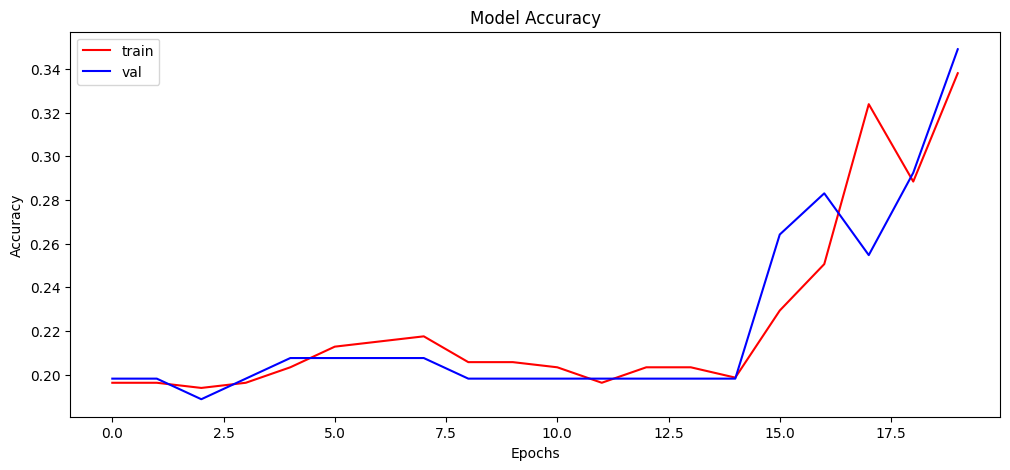

In [71]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

## We will use predict function to make predictions using this model also we are finding out the accuracy on the test set.

In [76]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 1s 292ms/step - loss: 4.2042 - accuracy: 0.4237
Accuracy over the test set: 
  42.37 %


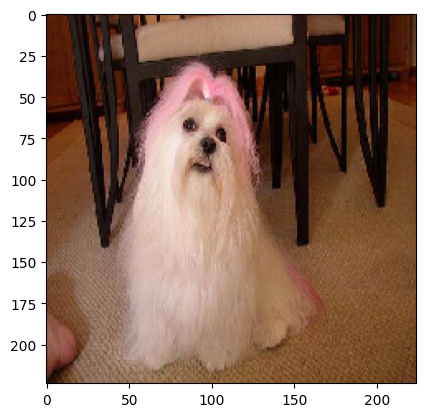

Originally :  maltese_dog
Predicted :  maltese_dog


In [77]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

In [57]:
# Save the first model
model.save('saved_models/model.h5')

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
# Building the Model with Regularization and Dropout
model_optimized = Sequential()

model_optimized.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(224,224,3), kernel_regularizer=l2(0.001)))  # Decreased regularization strength
model_optimized.add(MaxPool2D(pool_size=(2,2)))

model_optimized.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_regularizer='l2'))  # Decreased regularization strength
model_optimized.add(MaxPool2D(pool_size=(2,2)))

model_optimized.add(Conv2D(filters=16, kernel_size=(7,7), activation='relu', kernel_regularizer='l2'))  # Decreased regularization strength
model_optimized.add(MaxPool2D(pool_size=(2,2)))

model_optimized.add(Conv2D(filters=8, kernel_size=(5,5), activation='relu', kernel_regularizer='l2'))  # Decreased regularization strength
model_optimized.add(MaxPool2D(pool_size=(2,2)))

model_optimized.add(Flatten())
model_optimized.add(Dense(128, activation="relu", kernel_regularizer='l2'))  # Decreased regularization strength
model_optimized.add(Dropout(0.6))  # Increased dropout rate
model_optimized.add(Dense(64, activation="relu", kernel_regularizer='l2'))  # Decreased regularization strength
model_optimized.add(Dense(len(CLASS_NAME), activation="softmax"))

# Compile the model with the same loss function and optimizer
model_optimized.compile(loss='categorical_crossentropy', optimizer=Adam(0.00001), metrics=['accuracy'])

In [68]:
# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [70]:
# Train the model with the same parameters as before
history_optimized = model_optimized.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=20, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Epoch 1/20
14/14 [==============================] - 29s 2s/step - loss: 5.4270 - accuracy: 0.1726 - val_loss: 5.4078 - val_accuracy: 0.1698
Epoch 2/20
14/14 [==============================] - 19s 1s/step - loss: 5.4045 - accuracy: 0.2293 - val_loss: 5.3958 - val_accuracy: 0.1792
Epoch 3/20
14/14 [==============================] - 17s 1s/step - loss: 5.3978 - accuracy: 0.2080 - val_loss: 5.3834 - val_accuracy: 0.1887
Epoch 4/20
14/14 [==============================] - 17s 1s/step - loss: 5.3807 - accuracy: 0.1986 - val_loss: 5.3710 - val_accuracy: 0.1887
Epoch 5/20
14/14 [==============================] - 17s 1s/step - loss: 5.3681 - accuracy: 0.2104 - val_loss: 5.3588 - val_accuracy: 0.1887
Epoch 6/20
14/14 [==============================] - 17s 1s/step - loss: 5.3553 - accuracy: 0.2435 - val_loss: 5.3461 - val_accuracy: 0.1792
Epoch 7/20
14/14 [==============================] - 17s 1s/step - loss: 5.3454 - accuracy: 0.2033 - val_loss: 5.3336 - val_accuracy: 0.1981
Epoch 8/20
14/14 [==

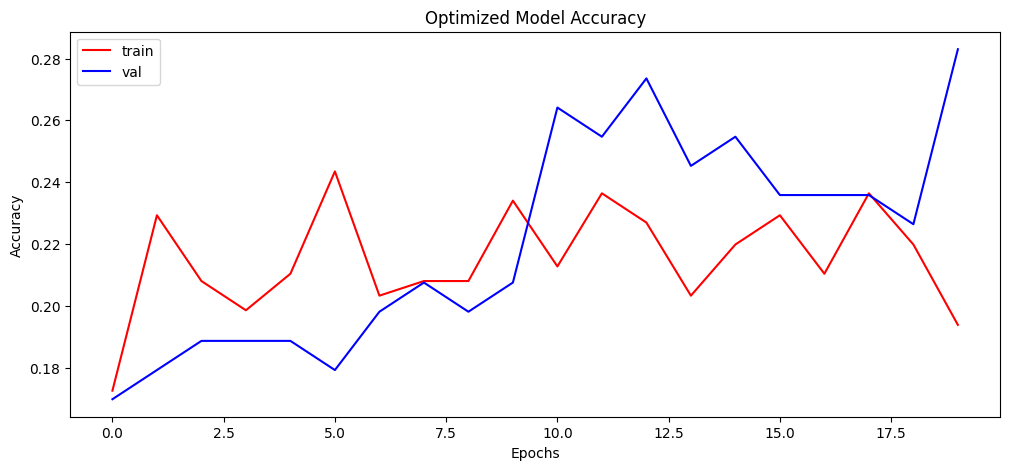

In [72]:
# Plot the training history for the optimized model
plt.figure(figsize=(12,  5))
plt.plot(history_optimized.history['accuracy'], color='r')
plt.plot(history_optimized.history['val_accuracy'], color='b')
plt.title('Optimized Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [73]:
# Make predictions using the optimized model
Y_pred_optimized = model_optimized.predict(X_test)
score_optimized = model_optimized.evaluate(X_test, Y_test)
print('Accuracy over the test set for optimized model: \n ', round((score_optimized[1]*100),  2), '%')

2/2 [==============================] - 1s 283ms/step - loss: 5.1722 - accuracy: 0.3729
Accuracy over the test set for optimized model: 
  37.29 %


In [74]:
# Save the optimized model
model_optimized.save('saved_models/model_optimized.h5')

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


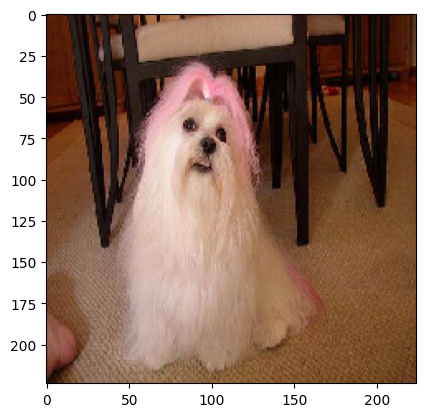

Original breed:  maltese_dog
Predicted breed:  scottish_deerhound


In [75]:
# Plotting an image from the test set
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding the index of the maximum value from the prediction list
# and comparing the original value with the predicted value
print("Original breed: ", labels['breed'][np.argmax(Y_test[1])])
print("Predicted breed: ", labels['breed'][np.argmax(Y_pred_optimized[1])])


# Conclusion
In this project, we explored the task of classifying dog breeds using convolutional neural networks (CNNs). We implemented two models: a baseline CNN model and an optimized CNN model with regularization techniques.

# Results:
The baseline model achieved an accuracy of approximately 42.37% on the test set, indicating moderate performance.
The optimized model, despite incorporating regularization techniques, achieved a lower accuracy of around 37.29% on the test set. This unexpected result suggests that further experimentation and tuning of hyperparameters may be necessary to improve model performance.
# Observations:
Both models exhibited signs of overfitting, as evidenced by the significant difference in performance between the training and validation/test sets.
The optimization techniques applied did not yield the expected improvements in model performance. This could be due to suboptimal hyperparameters or other factors influencing the training process.
# Future Work:
Further experimentation with hyperparameters, such as learning rate, batch size, and regularization strength, may be necessary to improve model performance.
Exploring more advanced optimization techniques, such as dropout and batch normalization, could potentially yield better results.
Conducting error analysis to identify the types of mistakes made by the models and potential avenues for improvement.
In conclusion, while the implemented models provide a foundation for dog breed classification, there is room for improvement in terms of model performance and generalization to unseen data. Continued experimentation and refinement of the models are necessary to achieve better results.